### **Step 1: Generate Synthetic Data**


In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of customers
num_customers = 150

# Generate synthetic data
data = {
    "Customer_ID": range(1, num_customers + 1),
    "Credit_Limit": np.random.randint(5000, 50000, num_customers),
    "Average_Purchase": np.random.randint(500, 5000, num_customers),
    "Income": np.random.randint(20000, 150000, num_customers)
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("customer_credit_data.csv", index=False)

# Show first 5 rows
df.head()

,Customer_ID,Credit_Limit,Average_Purchase,Income
0,1,20795,4127,26102
1,2,5860,1863,70336
2,3,43158,2481,138015
3,4,49732,2163,105314
4,5,16284,2029,143007


### **Step 2: Create a Bivariate Scatter Plot**


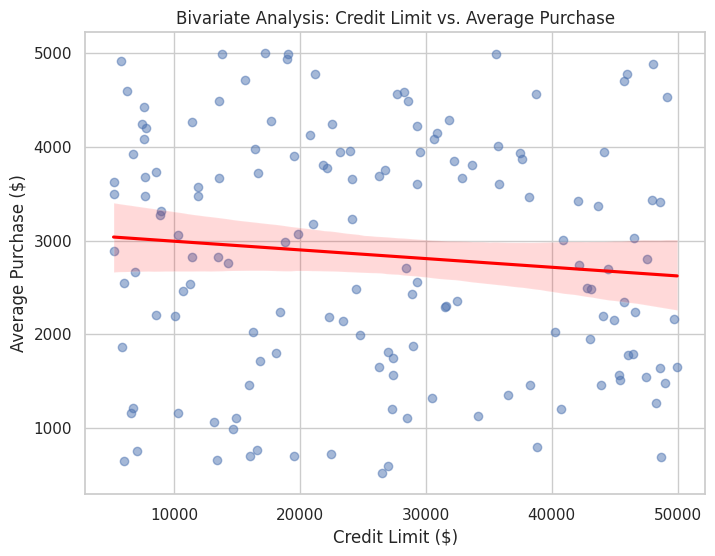

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x="Credit_Limit", y="Average_Purchase", data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("Credit Limit ($)")
plt.ylabel("Average Purchase ($)")
plt.title("Bivariate Analysis: Credit Limit vs. Average Purchase")

# Show plot
plt.show()


### **Step 3: Compute Correlation**


In [3]:
# Compute Pearson correlation coefficient
correlation = df["Credit_Limit"].corr(df["Average_Purchase"])

# Print correlation result
print(f"Correlation between Credit Limit and Average Purchase: {correlation:.2f}")


Correlation between Credit Limit and Average Purchase: -0.10


### **Step 4: Categorize Customers Based on Spending Behavior**


In [4]:
# Divide customers into Low, Medium, and High spenders based on average purchase
df["Spending_Category"] = pd.qcut(df["Average_Purchase"], q=3, labels=["Low", "Medium", "High"])

# Display first few rows
df.head()

,Customer_ID,Credit_Limit,Average_Purchase,Income,Spending_Category
0,1,20795,4127,26102,High
1,2,5860,1863,70336,Low
2,3,43158,2481,138015,Medium
3,4,49732,2163,105314,Low
4,5,16284,2029,143007,Low


### **Step 5: Outlier Detection Using Boxplot**


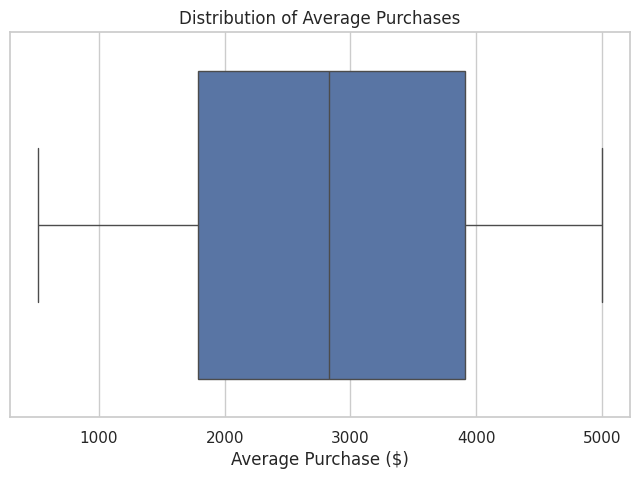

In [5]:
# Create boxplot for average purchases
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Average_Purchase"])

# Labels and title
plt.xlabel("Average Purchase ($)")
plt.title("Distribution of Average Purchases")

# Show plot
plt.show()

### **Step 6: Multi-Feature Analysis Using Pairplot**


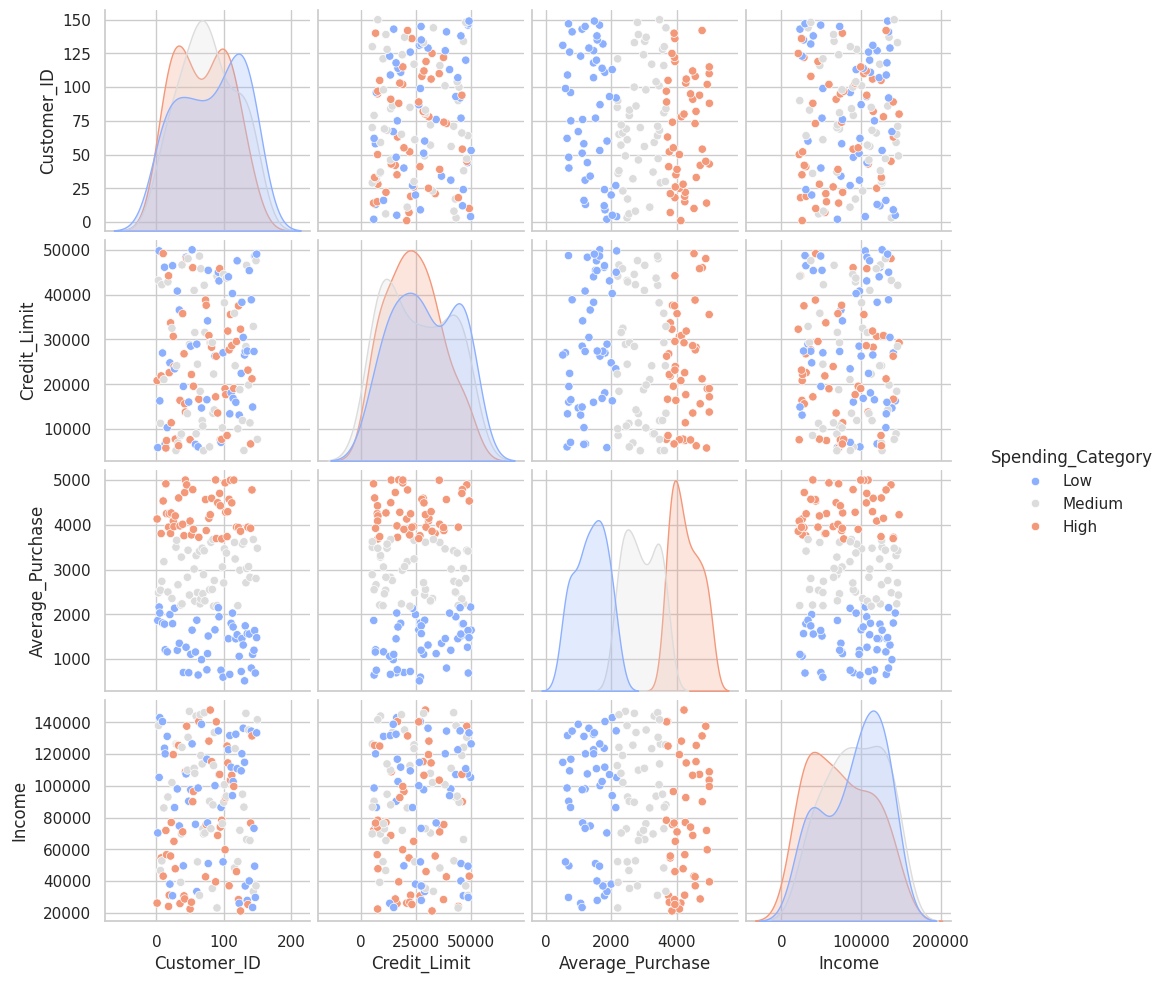

In [6]:
# Create pairplot to visualize relationships across multiple features
sns.pairplot(df, hue="Spending_Category", palette="coolwarm")

# Show plot
plt.show()

## **Analysis of Results**
1. **Scatter Plot Interpretation**
   - If the scatter points form an upward trend, it indicates a **positive correlation** (higher credit limits lead to higher spending).
   - If the points are scattered randomly, it means there is **no strong correlation**.
   - If the points form a downward trend, it suggests a **negative correlation** (higher credit limits lead to lower spending).

2. **Correlation Interpretation**
   - A **high positive value (close to 1)** suggests that customers with higher credit limits tend to spend more.
   - A **low or zero correlation** suggests that credit limit does not significantly impact spending behavior.

3. **Boxplot Insights**
   - If there are **outliers**, it means some customers are spending much more or much less than the general trend.

4. **Spending Categories**
   - **Low spenders** may be those who are more financially cautious or have lower financial needs.
   - **High spenders** might be customers who frequently use their credit cards for large purchases.